# Comparing different atmospheric soundings <a class='tocSkip'></a>

Thomas Schanzer z5310829  
School of Physics, UNSW  
September 2021

Now that we have all the relevant functions ready in the $\verb |Environment|$ class, we will use them to compare several different atmospheric soundings:
- Sydney, Australia
- Singapore (humid)
- Abu Dhabi, United Arab Emirates (hot)
- Mawson, Antarctica (cold, dry)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducing-the-soundings" data-toc-modified-id="Introducing-the-soundings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducing the soundings</a></span></li><li><span><a href="#Dry-regime" data-toc-modified-id="Dry-regime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dry regime</a></span><ul class="toc-item"><li><span><a href="#Maximum-specific-humidity-increase" data-toc-modified-id="Maximum-specific-humidity-increase-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Maximum specific humidity increase</a></span></li><li><span><a href="#Neutral-buoyancy-level" data-toc-modified-id="Neutral-buoyancy-level-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Neutral buoyancy level</a></span></li><li><span><a href="#Parcel-motion" data-toc-modified-id="Parcel-motion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Parcel motion</a></span></li><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li></ul></li><li><span><a href="#Saturated-regime" data-toc-modified-id="Saturated-regime-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saturated regime</a></span><ul class="toc-item"><li><span><a href="#Neutral-buoyancy-level" data-toc-modified-id="Neutral-buoyancy-level-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Neutral buoyancy level</a></span></li><li><span><a href="#Parcel-motion" data-toc-modified-id="Parcel-motion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parcel motion</a></span></li><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li></ul></li><li><span><a href="#Limited-water-regime" data-toc-modified-id="Limited-water-regime-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Limited water regime</a></span><ul class="toc-item"><li><span><a href="#The-liquid-mass-correction" data-toc-modified-id="The-liquid-mass-correction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The liquid mass correction</a></span></li><li><span><a href="#Neutral-buoyancy-level" data-toc-modified-id="Neutral-buoyancy-level-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Neutral buoyancy level</a></span></li><li><span><a href="#Parcel-motion" data-toc-modified-id="Parcel-motion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Parcel motion</a></span></li><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li></ul></li><li><span><a href="#Feedback-and-next-steps" data-toc-modified-id="Feedback-and-next-steps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feedback and next steps</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.constants as const
from metpy.units import units
from metpy.units import concatenate
from metpy.plots import SkewT
from pint import UnitRegistry, set_application_registry

from scipy.optimize import root_scalar

from os import mkdir
from os.path import exists
import sys
import shelve

sys.path.append('../../scripts/')
from environment import Environment

In [2]:
set_application_registry(units)
fig_path = ('20210922_sounding_comparisons_figures/')
if not exists(fig_path):
    mkdir(fig_path)
data_filename = '20210922_sounding_comparisons_data'

## Introducing the soundings

In [3]:
file = '../../soundings/SYDNEY AIRPORT (94767) 12 Nov 2019 00Z.txt'
sounding = pd.read_csv(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=0)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
sydney = Environment(
    pressure, temperature, dewpoint,
    info='SYDNEY AIRPORT (94767) 12 Nov 2019 00Z', name='Sydney')

In [4]:
file = '../../soundings/48698 WSSS Singapore Observations at 00Z 02 Sep 2021.txt'
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
singapore = Environment(
    pressure, temperature, dewpoint,
    info='48698 WSSS Singapore Observations at 00Z 02 Sep 2021',
    name='Singapore')

In [5]:
file = ('../../soundings/41217 OMAA Abu Dhabi Inter Arpt Observations at '
        '12Z 20 Sep 2021.txt')
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
abu_dhabi = Environment(
    pressure, temperature, dewpoint,
    info='41217 OMAA Abu Dhabi Inter Arpt Observations at 12Z 20 Sep 2021',
    name='Abu Dhabi')

In [6]:
file = ('../../soundings/89564 Mawson Observations at 12Z 21 Sep 2021.txt')
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
mawson = Environment(
    pressure, temperature, dewpoint,
    info='89564 Mawson Observations at 12Z 21 Sep 2021', name='Mawson')

In [ ]:
# save sounding objects to file
with shelve.open(data_filename) as file:
    for sounding in [sydney, singapore, abu_dhabi, mawson]:
        file[sounding.name] = sounding

In [3]:
# retrieve sounding objects from file
with shelve.open(data_filename) as file:
    sydney = file['Sydney']
    singapore = file['Singapore']
    abu_dhabi = file['Abu Dhabi']
    mawson = file['Mawson']

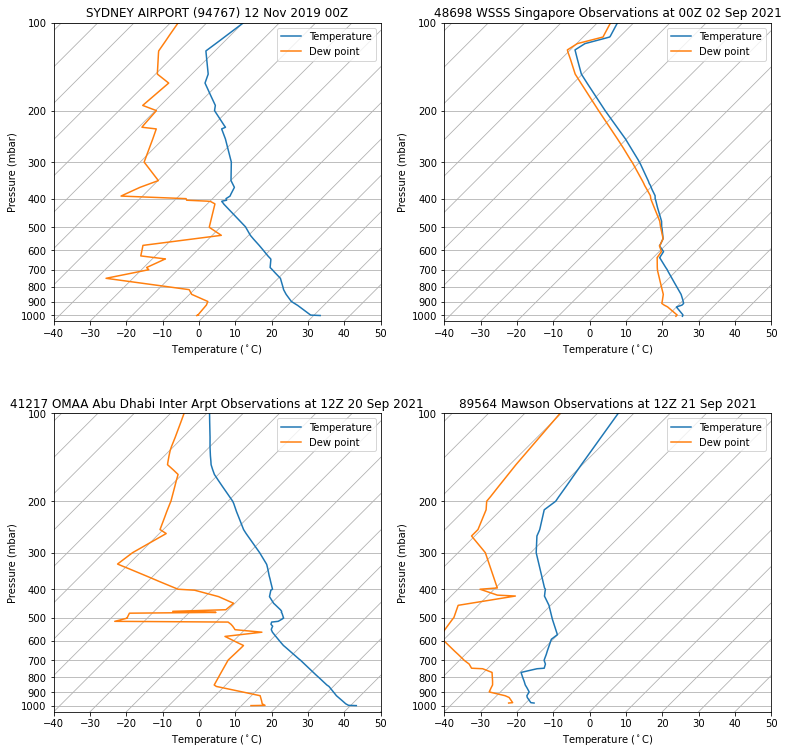

In [4]:
fig = plt.figure(figsize=(11,11))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    skew = SkewT(fig, subplot=(2,2,i+1), rotation=45)
    skew.plot(
        sounding.pressure_raw, sounding.temperature_raw, label='Temperature')
    skew.plot(sounding.pressure_raw, sounding.dewpoint_raw, label='Dew point')
    skew.ax.legend()
    skew.ax.set(
        xlabel=r'Temperature ($^\circ$C)',
        ylabel='Pressure (mbar)',
        title=sounding.info)

fig.tight_layout()
# fig.savefig(
#     fig_path + 'skew-t.png', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

## Dry regime
### Maximum specific humidity increase

In [ ]:
height = np.arange(0, 10.1, 0.1)*units.km
max_dq = {}
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}'.format(sounding.name))
    max_dq[sounding.name] = sounding.maximum_specific_humidity_change(height)

In [ ]:
# save to file
with shelve.open(data_filename) as file:
    file['max_dq'] = {'height': height, 'max_dq': max_dq}

In [5]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['max_dq']['height']
    max_dq = file['max_dq']['max_dq']

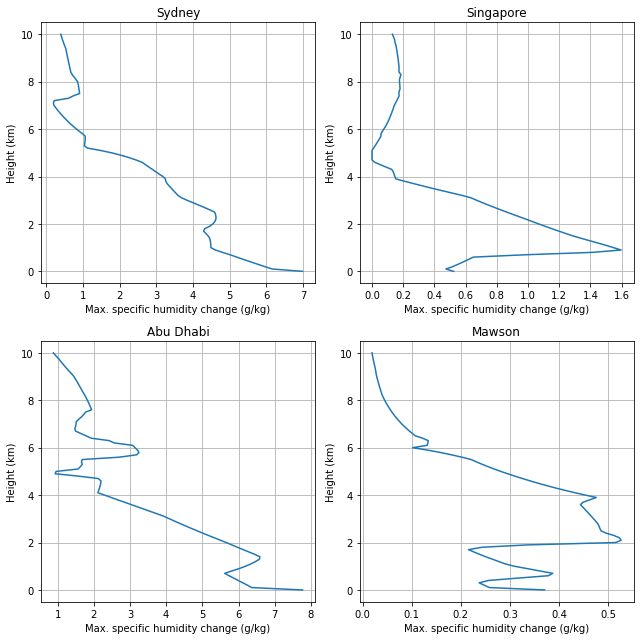

In [6]:
fig = plt.figure(figsize=(9,9))
for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(max_dq[sounding.name]*1e3, height)
    ax.set(
        xlabel='Max. specific humidity change (g/kg)',
        ylabel='Height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
# fig.savefig(
#     fig_path + 'max_dq.png', dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Neutral buoyancy level

In [ ]:
height = np.arange(0, 10.01, 0.25)*units.km
dry_buoyancy_level = {}
dq = {}
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    max_max_dq = np.max(max_dq[sounding.name])
    dq[sounding.name] = np.arange(0, max_max_dq*1.001, max_max_dq/60 )
    dry_buoyancy_level[sounding.name] = sounding.dry_neutral_buoyancy_level(
        height, dq[sounding.name])
    sys.stdout.write('\n')

In [ ]:
# save to file
height = np.arange(0, 10.01, 0.25)*units.km
with shelve.open(data_filename) as file:
    file['dry_buoyancy_level'] = {
        'height': height, 'dq': dq, 'dry_buoyancy_level': dry_buoyancy_level}

In [7]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['dry_buoyancy_level']['height']
    dq = file['dry_buoyancy_level']['dq']
    dry_buoyancy_level = file['dry_buoyancy_level']['dry_buoyancy_level']

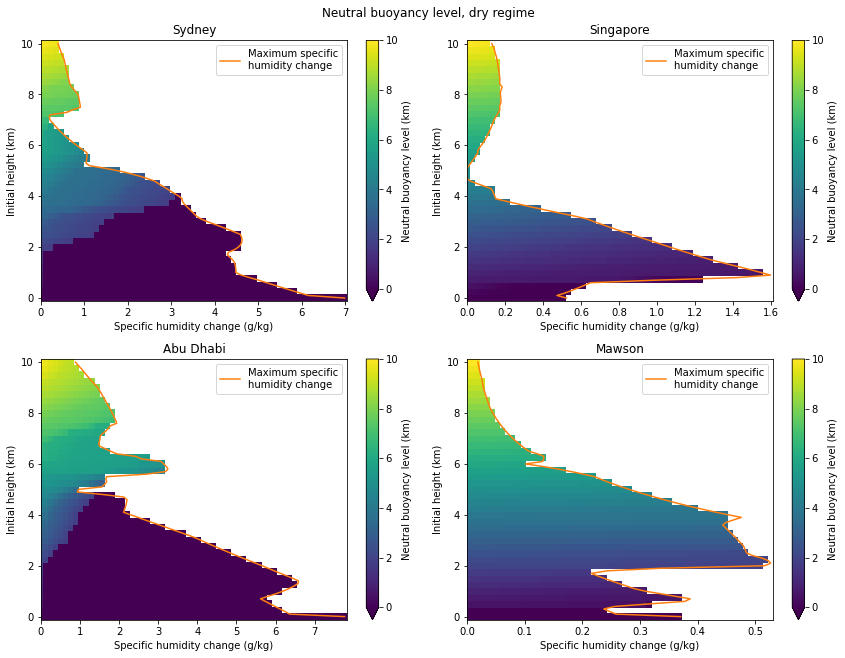

In [8]:
fig = plt.figure(figsize=(12,9))
# height = np.arange(0, 10.01, 0.25)*units.km

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    mesh = ax.pcolormesh(
        dq[sounding.name]*1e3, height, dry_buoyancy_level[sounding.name],
        shading='nearest')
    cbar = plt.colorbar(mesh, extend='min')
    cbar.set_label('Neutral buoyancy level (km)')

    ax.plot(
        max_dq[sounding.name]*1e3, np.arange(0, 10.01, 0.1)*units.km,
        label='Maximum specific\nhumidity change', color='tab:orange')
    ax.legend()

    ax.set(
        xlabel='Specific humidity change (g/kg)',
        ylabel='Initial height (km)',
        title=sounding.name)
    ax.set_xlim(left=0)

fig.tight_layout()
fig.suptitle('Neutral buoyancy level, dry regime', y=1.01)
# fig.savefig(
#     fig_path + 'dry_neutral_buoyancy_level.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

### Parcel motion

In [ ]:
dry_motion_3km = {}
initial_height = 3*units.km
initial_height_array = {}
dq = {}
time = np.arange(0, 9*60, 15)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    max_dq = sounding.maximum_specific_humidity_change(initial_height)
    dq[sounding.name] = np.arange(0, max_dq*1.001, max_dq/40)
    initial_height_array[sounding.name] = np.ones(
        len(dq[sounding.name]))*initial_height
    dry_motion_3km[sounding.name] = sounding.modified_motion(
        time, initial_height_array[sounding.name], dq[sounding.name],
        regime='dry')
    sys.stdout.write('\n')

In [ ]:
# save to file
time = np.arange(0, 9*60, 15)*units.second
with shelve.open(data_filename) as file:
    file['dry_motion_3km'] = {
        'dq': dq, 'time': time, 'dry_motion_3km': dry_motion_3km}

In [9]:
# retrieve from file
with shelve.open(data_filename) as file:
    dq = file['dry_motion_3km']['dq']
    time = file['dry_motion_3km']['time']
    dry_motion_3km = file['dry_motion_3km']['dry_motion_3km']

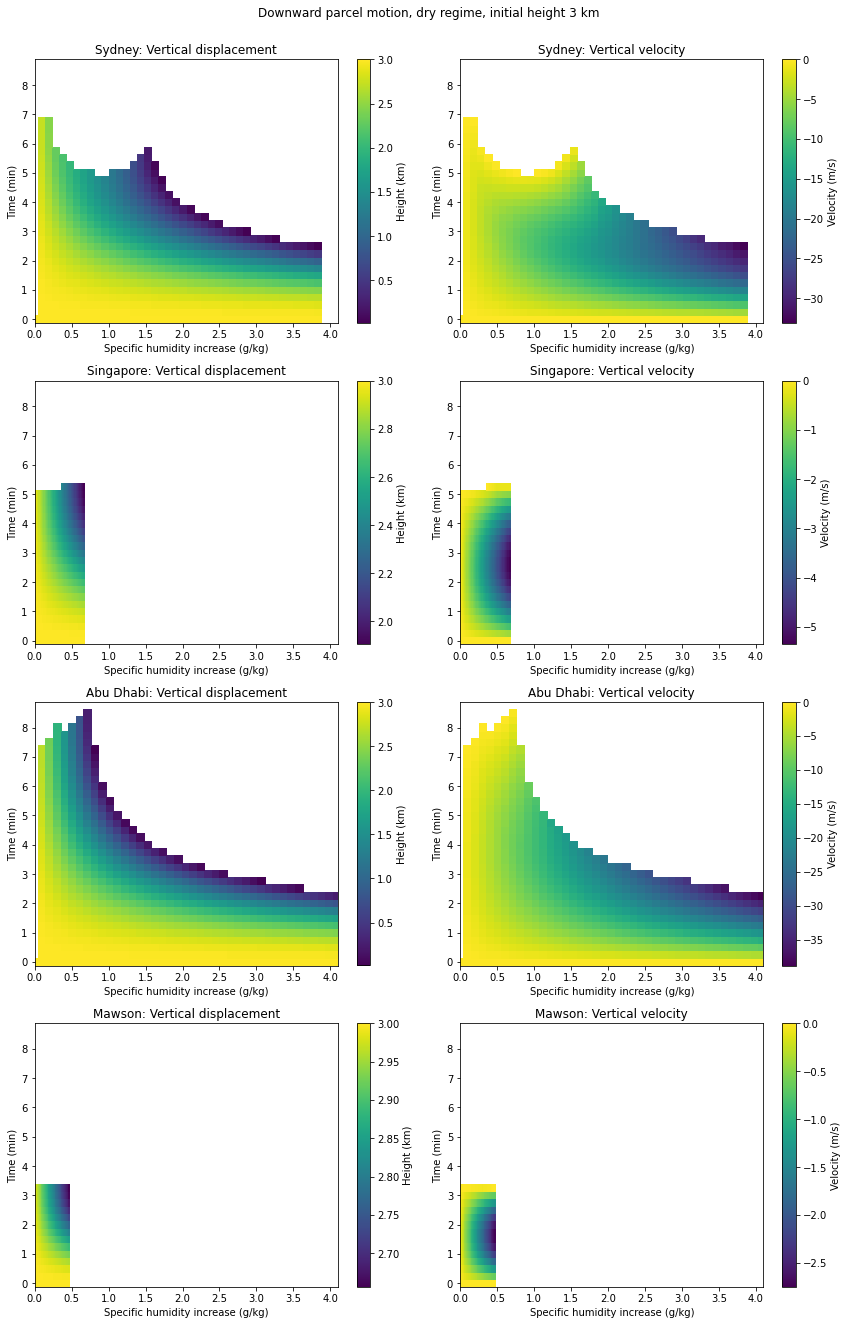

In [10]:
fig = plt.figure(figsize=(12,18))
time = np.arange(0, 9*60, 15)*units.second

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax1 = fig.add_subplot(421+2*i)
    mesh = ax1.pcolormesh(
        dq[sounding.name]*1e3, time/60, 
        dry_motion_3km[sounding.name].height.T/1e3, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Height (km)')
    ax1.set(
        xlabel='Specific humidity increase (g/kg)',
        ylabel='Time (min)',
        title='{}: Vertical displacement'.format(sounding.name))
#     ax1.set_ylim(0, 9)
    ax1.set_xlim(0,4.1)

    ax2 = fig.add_subplot(422+2*i)
    mesh = ax2.pcolormesh(
        dq[sounding.name]*1e3, time/60, 
        dry_motion_3km[sounding.name].velocity.T, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Velocity (m/s)')
    ax2.set(
        xlabel='Specific humidity increase (g/kg)',
        ylabel='Time (min)',
        title='{}: Vertical velocity'.format(sounding.name))
#     ax2.set_ylim(0, 9)
    ax2.set_xlim(0,4.1)

fig.tight_layout()
fig.suptitle('Downward parcel motion, dry regime, initial height 3 km', y=1.02)
# fig.savefig(
#     fig_path + 'dry_motion_3km_scaled.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

### Velocity at ground impact

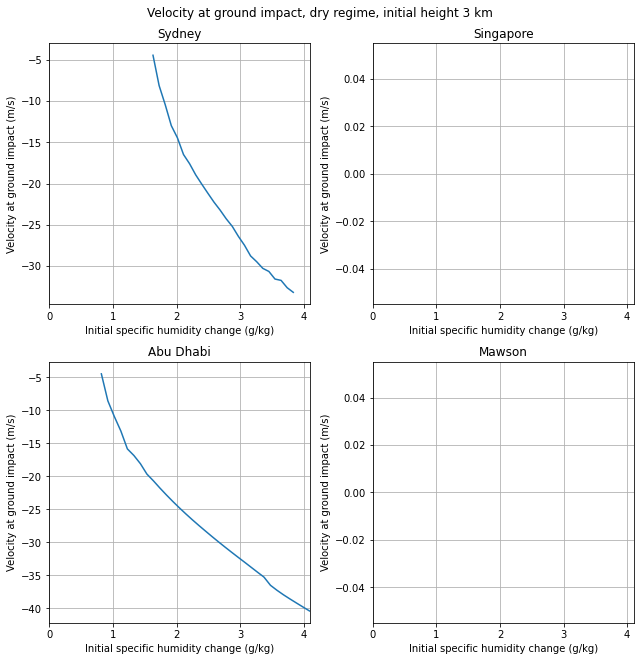

In [11]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        dry_motion_3km[sounding.name].hit_ground_velocity)
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact, dry regime, initial height 3 km', y=1.015)
# fig.savefig(
#     fig_path + 'dry_ground_impact_velocity_3km.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

## Saturated regime
### Neutral buoyancy level

In [ ]:
height = np.arange(0, 10.01, 0.1)*units.km
saturated_buoyancy_level = {}
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    saturated_buoyancy_level[sounding.name] = \
        sounding.saturated_neutral_buoyancy_level(height)
    sys.stdout.write('\n')

In [ ]:
# save to file
height = np.arange(0, 10.01, 0.1)*units.km
with shelve.open(data_filename) as file:
    file['saturated_buoyancy_level'] = {
        'height': height, 'saturated_buoyancy_level': saturated_buoyancy_level}

In [12]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['saturated_buoyancy_level']['height']
    saturated_buoyancy_level = \
        file['saturated_buoyancy_level']['saturated_buoyancy_level']

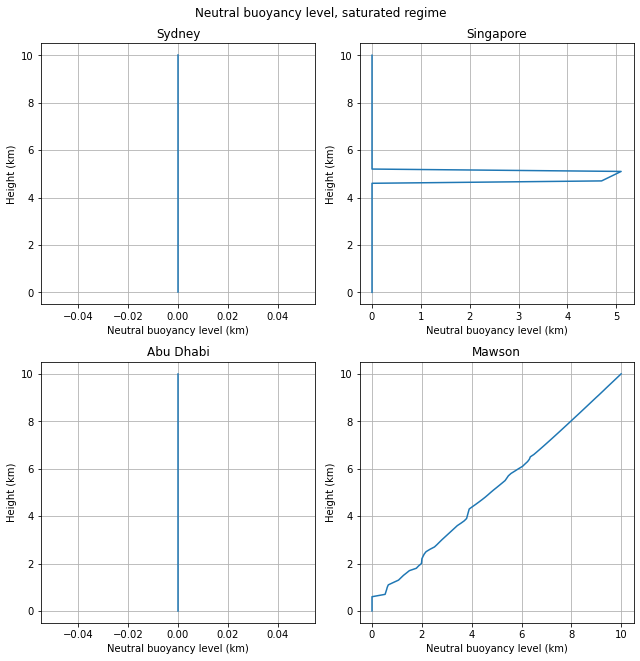

In [13]:
fig = plt.figure(figsize=(9,9))
height = np.arange(0, 10.01, 0.1)*units.km

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(saturated_buoyancy_level[sounding.name], height)
    ax.set(
        xlabel='Neutral buoyancy level (km)',
        ylabel='Height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle('Neutral buoyancy level, saturated regime', y=1.015)
# fig.savefig(
#     fig_path + 'saturated_neutral_buoyancy_level.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

### Parcel motion

In [ ]:
saturated_motion = {}
initial_height = np.arange(0, 10.01, 0.1)*units.km
time = np.arange(0, 15*60, 20)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    saturated_motion[sounding.name] = sounding.modified_motion(
        time, initial_height, regime='saturated')
    sys.stdout.write('\n')

In [ ]:
# save to file
initial_height = np.arange(0, 10.01, 0.1)*units.km
time = np.arange(0, 15*60, 20)*units.second
with shelve.open(data_filename) as file:
    file['saturated_motion'] = {
        'initial_height': initial_height, 'time': time,
        'saturated_motion': saturated_motion}

In [14]:
# retrieve from file
with shelve.open(data_filename) as file:
    initial_height = file['saturated_motion']['initial_height']
    time = file['saturated_motion']['time']
    saturated_motion = file['saturated_motion']['saturated_motion']

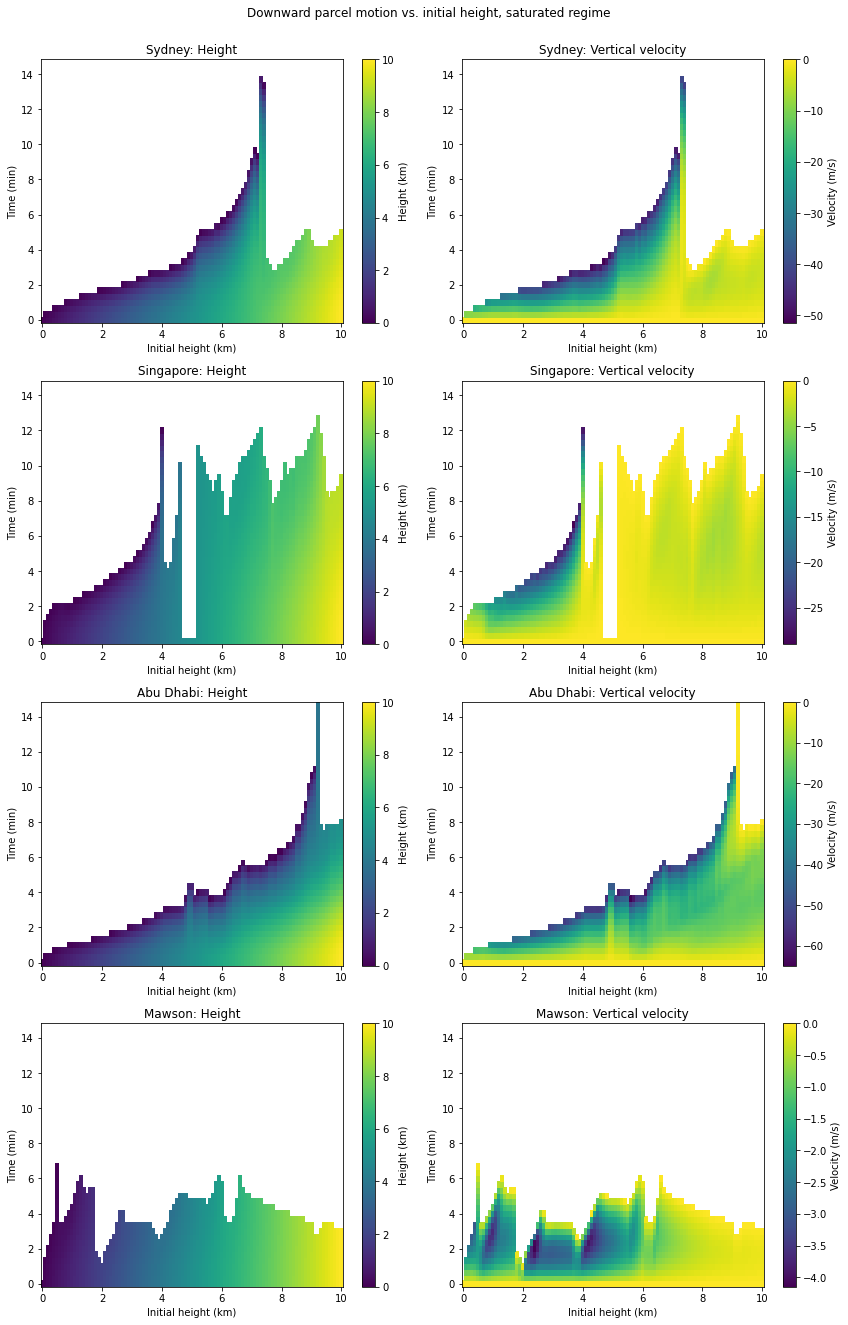

In [15]:
fig = plt.figure(figsize=(12,18))
time = np.arange(0, 15*60, 20)*units.second
initial_height = np.arange(0, 10.01, 0.1)*units.km

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax1 = fig.add_subplot(421+2*i)
    mesh = ax1.pcolormesh(
        initial_height, time/60, 
        saturated_motion[sounding.name].height.T.to(units.km),
        shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Height (km)')
    ax1.set(
        xlabel='Initial height (km)',
        ylabel='Time (min)',
        title='{}: Height'.format(sounding.name))

    ax2 = fig.add_subplot(422+2*i)
    mesh = ax2.pcolormesh(
        initial_height, time/60, 
        saturated_motion[sounding.name].velocity.T, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Velocity (m/s)')
    ax2.set(
        xlabel='Initial height (km)',
        ylabel='Time (min)',
        title='{}: Vertical velocity'.format(sounding.name))

fig.tight_layout()
fig.suptitle(
    'Downward parcel motion vs. initial height, saturated regime', y=1.02)
# fig.savefig(
#     fig_path + 'saturated_motion.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

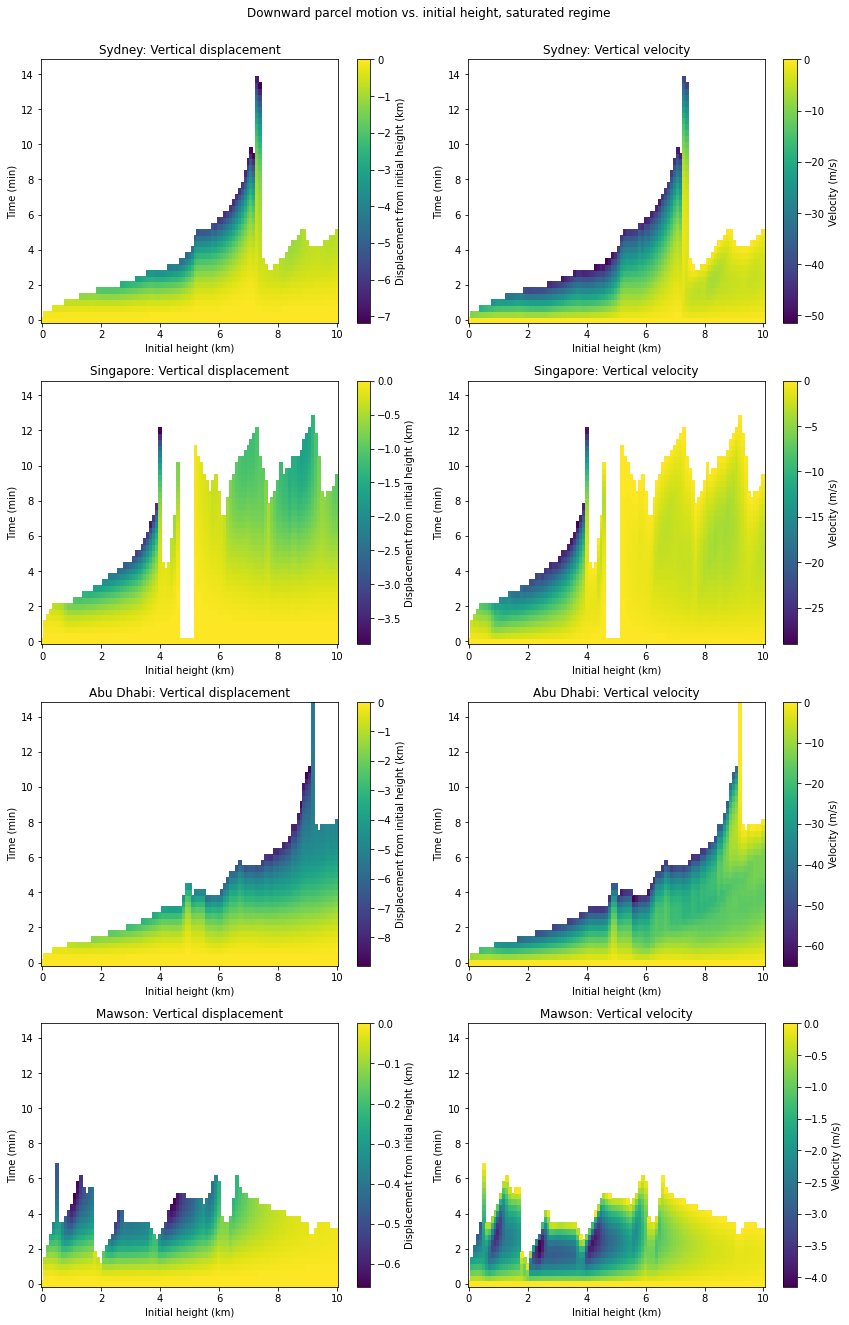

In [16]:
fig = plt.figure(figsize=(12,18))
time = np.arange(0, 15*60, 20)*units.second
initial_height = np.arange(0, 10.01, 0.1)*units.km

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax1 = fig.add_subplot(421+2*i)
    mesh = ax1.pcolormesh(
        initial_height, time/60, 
        saturated_motion[sounding.name].height.T.to(units.km) - initial_height,
        shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Displacement from initial height (km)')
    ax1.set(
        xlabel='Initial height (km)',
        ylabel='Time (min)',
        title='{}: Vertical displacement'.format(sounding.name))

    ax2 = fig.add_subplot(422+2*i)
    mesh = ax2.pcolormesh(
        initial_height, time/60, 
        saturated_motion[sounding.name].velocity.T, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Velocity (m/s)')
    ax2.set(
        xlabel='Initial height (km)',
        ylabel='Time (min)',
        title='{}: Vertical velocity'.format(sounding.name))

fig.tight_layout()
fig.suptitle(
    'Downward parcel motion vs. initial height, saturated regime', y=1.02)
# fig.savefig(
#     fig_path + 'saturated_motion_displacement.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

### Velocity at ground impact

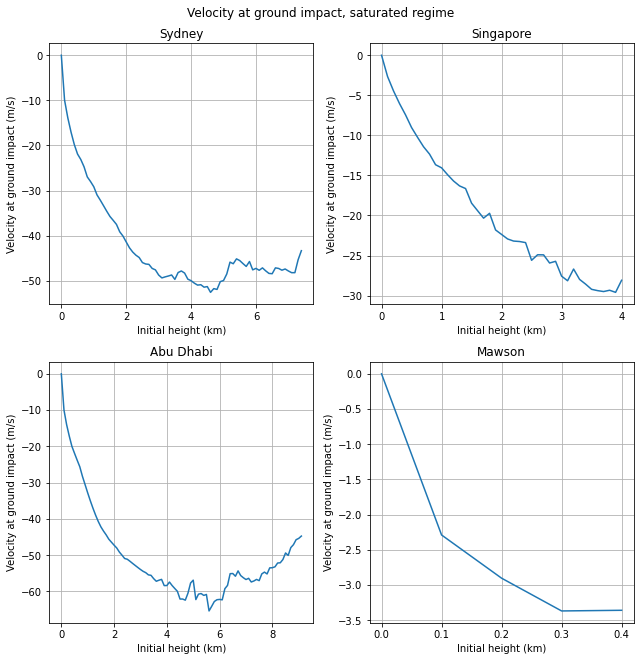

In [17]:
fig = plt.figure(figsize=(9,9))
initial_height = np.arange(0, 10.01, 0.1)*units.km

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        saturated_motion[sounding.name].hit_ground_velocity)
#     ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact, saturated regime', y=1.015)
# fig.savefig(
#     fig_path + 'saturated_ground_impact_velocity.png', dpi=300, facecolor='w',
#     bbox_inches='tight')
plt.show()

## Limited water regime
### The liquid mass correction
In order to account for the effect of liquid water on the parcel's density, we assume that the liquid makes a negligible contribution to the total volume (but a non-negligible contribution to the total mass). The corrected density of the parcel is then the sum of the partial density of gases $\rho_g$ (which we have already calculated) and the partial density of water $\rho_l$:
$$
    \rho = \frac{m_\rm{gas} + m_\rm{liquid}}{V} = \rho_g + \rho_l.
$$
If we use $q_l$ to denote the ratio of the partial density of liquid to the total density (which is known), we can express the total density in terms of the partial density of gas and this parameter:
$$
\begin{align}
    \rho_g &= \rho \left( 1 - \frac{\rho_l}{\rho} \right) = \rho (1 - q_l) \\
    \Leftrightarrow \rho &= \frac{\rho_g}{1 - q_l}.
\end{align}
$$

### Neutral buoyancy level

In [7]:
height = np.arange(0, 10.01, 0.5)*units.km
liquid_ratio = np.arange(0, 5e-3, 0.25e-3)
limited_buoyancy_level = {}
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    limited_buoyancy_level[sounding.name] = \
        sounding.limited_neutral_buoyancy_level(height, liquid_ratio)
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating buoyancy level 420 of 420.       
Calculating for Singapore:
Calculating buoyancy level 420 of 420.       
Calculating for Abu Dhabi:
Calculating buoyancy level 420 of 420.       
Calculating for Mawson:
Calculating buoyancy level 420 of 420.       


In [9]:
# save to file
with shelve.open(data_filename) as file:
    file['corrected_limited_buoyancy_level'] = {
        'height': height, 'liquid_ratio': liquid_ratio,
        'limited_buoyancy_level': limited_buoyancy_level}

In [12]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['limited_buoyancy_level']['height']
    liquid_ratio = file['limited_buoyancy_level']['liquid_ratio']
    old_limited_buoyancy_level = \
        file['limited_buoyancy_level']['limited_buoyancy_level']

In [18]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['corrected_limited_buoyancy_level']['height']
    liquid_ratio = file['corrected_limited_buoyancy_level']['liquid_ratio']
    limited_buoyancy_level = \
        file['corrected_limited_buoyancy_level']['limited_buoyancy_level']

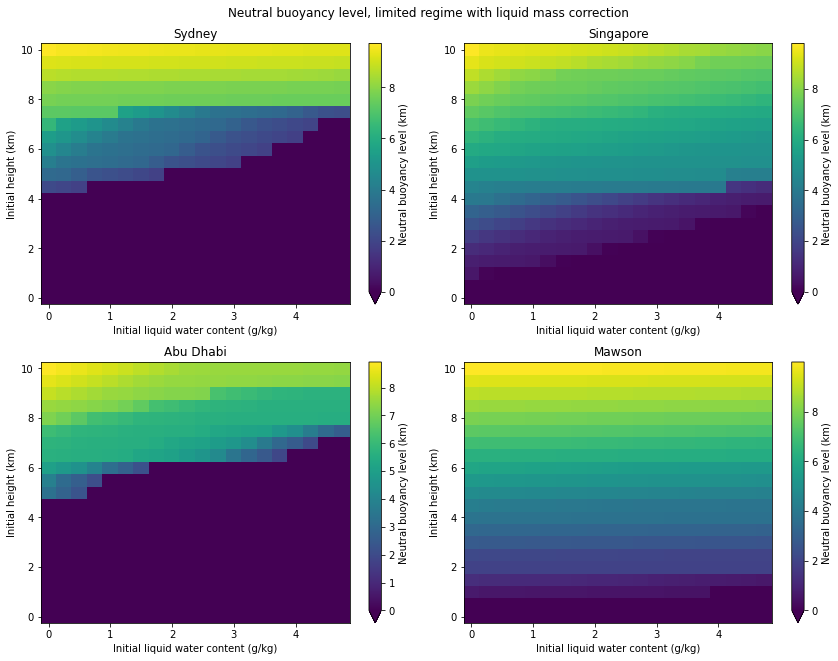

In [11]:
fig = plt.figure(figsize=(12,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    mesh = ax.pcolormesh(
        liquid_ratio*1e3, height, limited_buoyancy_level[sounding.name],
        shading='nearest')
    cbar = plt.colorbar(mesh, extend='min')
    cbar.set_label('Neutral buoyancy level (km)')

    ax.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Initial height (km)',
        title=sounding.name)

fig.tight_layout()
fig.suptitle(
    'Neutral buoyancy level, limited regime with liquid mass correction',
    y=1.015)
fig.savefig(
    fig_path + 'limited_neutral_buoyancy_level_corrected.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

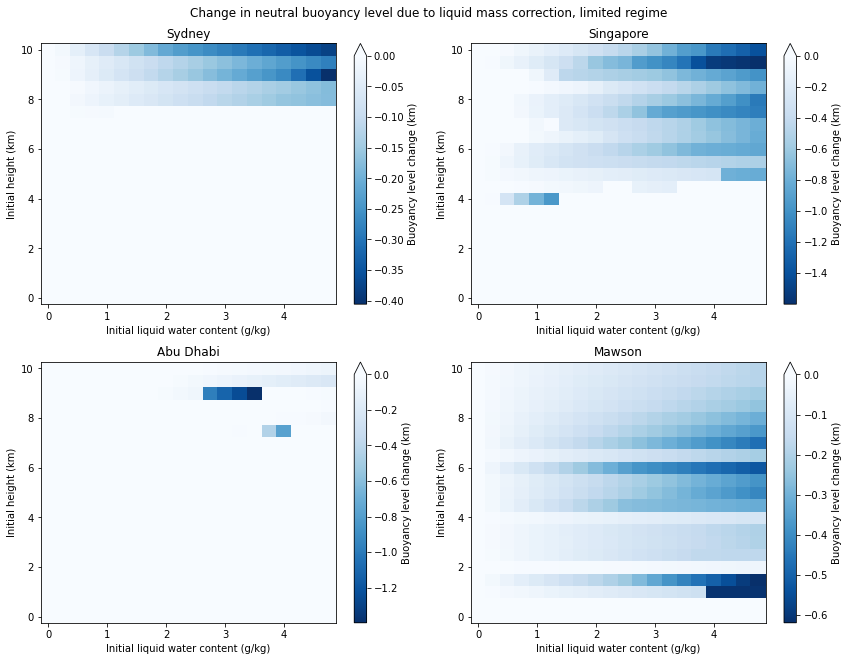

In [17]:
fig = plt.figure(figsize=(12,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    mesh = ax.pcolormesh(
        liquid_ratio*1e3, height,
        (limited_buoyancy_level[sounding.name]
         - old_limited_buoyancy_level[sounding.name]),
        shading='nearest', cmap='Blues_r', vmax=0)
    cbar = plt.colorbar(mesh, extend='max')
    cbar.set_label('Buoyancy level change (km)')

    ax.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Initial height (km)',
        title=sounding.name)

fig.tight_layout()
fig.suptitle(
    'Change in neutral buoyancy level due to liquid mass correction, '
    'limited regime',
    y=1.015)
fig.savefig(
    fig_path + 'limited_neutral_buoyancy_level_correction_difference.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Parcel motion

In [18]:
limited_motion_3km = {}
liquid_ratio = np.arange(0, 5.01e-3, 0.25e-3)
initial_height = np.ones(len(liquid_ratio))*3*units.km
initial_velocity = np.ones(len(liquid_ratio))*0*units.meter/units.second
time = np.arange(0, 6*60, 10)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    limited_motion_3km[sounding.name] = sounding.modified_motion(
        time, initial_height, initial_velocity, liquid_ratio, regime='limited')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 21 of 21.   
Calculating for Singapore:
Calculating profile 21 of 21.   
Calculating for Abu Dhabi:
Calculating profile 21 of 21.   
Calculating for Mawson:
Calculating profile 21 of 21.   


In [19]:
# save to file
with shelve.open(data_filename) as file:
    file['limited_motion_3km_corrected'] = {
        'liquid_ratio': liquid_ratio, 'time': time,
        'limited_motion_3km': limited_motion_3km}

In [20]:
# retrieve from file
with shelve.open(data_filename) as file:
    liquid_ratio = file['limited_motion_3km']['liquid_ratio']
    time = file['limited_motion_3km']['time']
    limited_motion_3km = file['limited_motion_3km']['limited_motion_3km']

In [24]:
# retrieve from file
with shelve.open(data_filename) as file:
    liquid_ratio = file['limited_motion_3km']['liquid_ratio']
    time = file['limited_motion_3km']['time']
    limited_motion_3km_old = file['limited_motion_3km']['limited_motion_3km']

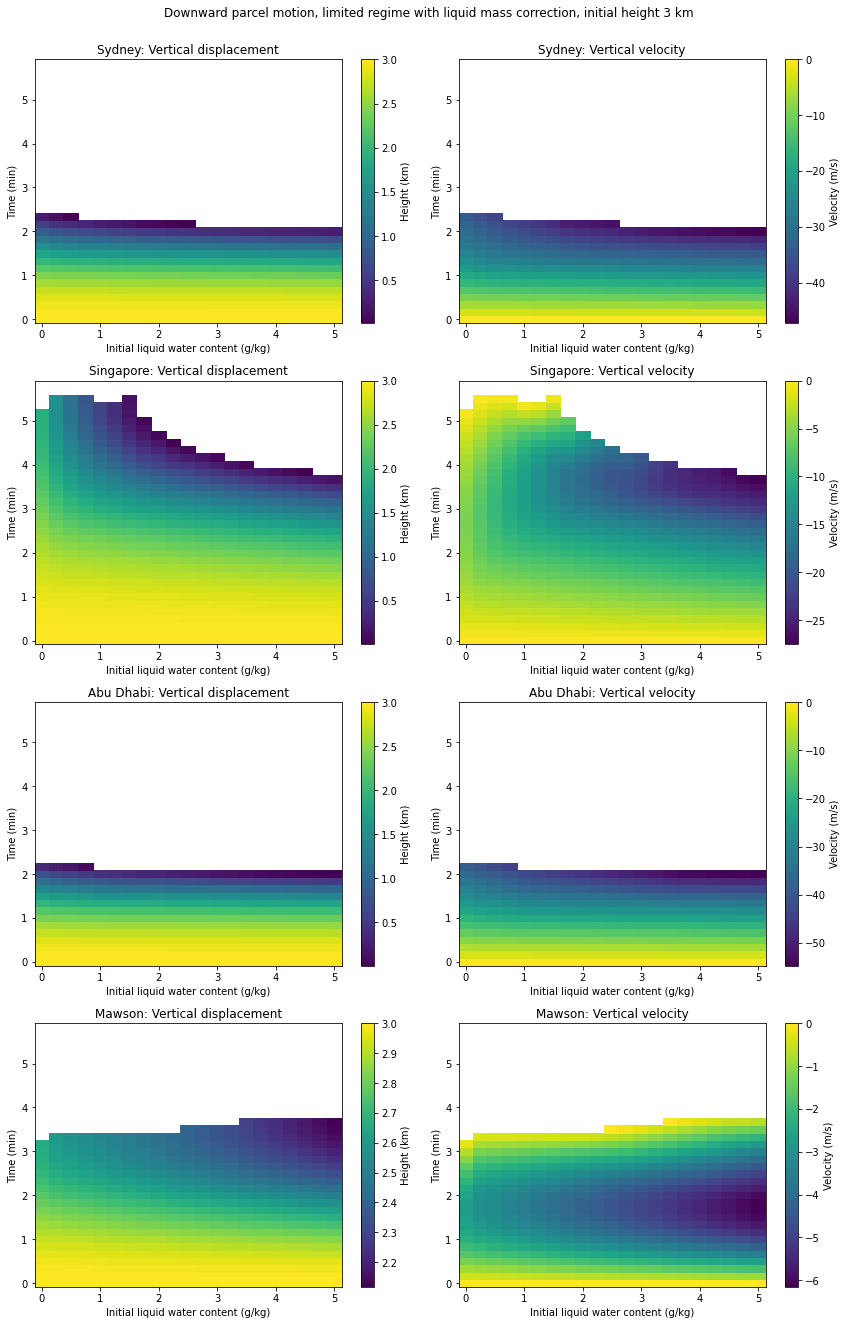

In [21]:
fig = plt.figure(figsize=(12,18))
time = np.arange(0, 6*60, 10)*units.second
liquid_ratio = np.arange(0, 5.01e-3, 0.25e-3)

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax1 = fig.add_subplot(421+2*i)
    mesh = ax1.pcolormesh(
        liquid_ratio*1e3, time/60, 
        limited_motion_3km[sounding.name].height.T/1e3, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Height (km)')
    ax1.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Time (min)',
        title='{}: Vertical displacement'.format(sounding.name))
#     ax1.set_ylim(0, 9)
#     ax1.set_xlim(0,4.1)

    ax2 = fig.add_subplot(422+2*i)
    mesh = ax2.pcolormesh(
        liquid_ratio*1e3, time/60, 
        limited_motion_3km[sounding.name].velocity.T, shading='nearest')
    cbar = plt.colorbar(mesh)
    cbar.set_label('Velocity (m/s)')
    ax2.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Time (min)',
        title='{}: Vertical velocity'.format(sounding.name))
#     ax2.set_ylim(0, 9)
#     ax2.set_xlim(0,4.1)

fig.tight_layout()
fig.suptitle(
    'Downward parcel motion, limited regime with liquid mass correction, '
    'initial height 3 km', y=1.02)
fig.savefig(
    fig_path + 'limited_motion_3km_corrected.png', dpi=300, facecolor='w',
    bbox_inches='tight')
plt.show()

### Velocity at ground impact

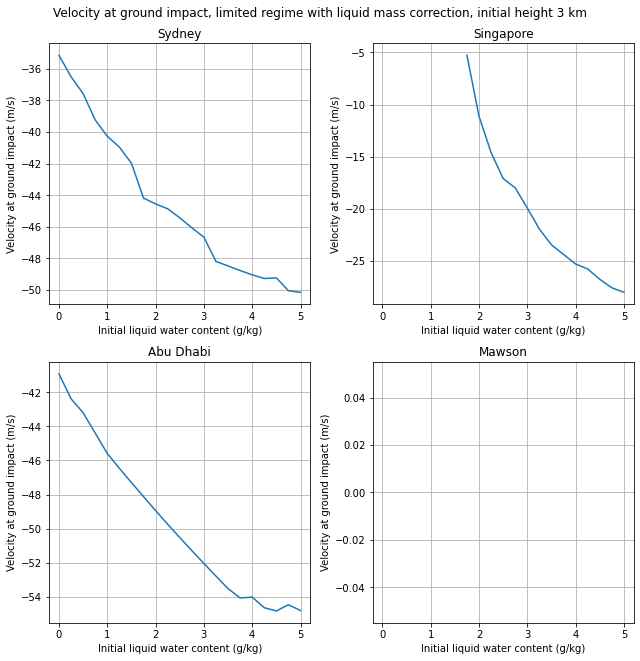

In [31]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        limited_motion_3km[sounding.name].hit_ground_velocity)
    ax.set_xlim(-0.2, 5.2)
    ax.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact, limited regime with liquid mass correction, '
    'initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_ground_impact_velocity_3km_corrected.png', dpi=300,
    facecolor='w', bbox_inches='tight')
plt.show()

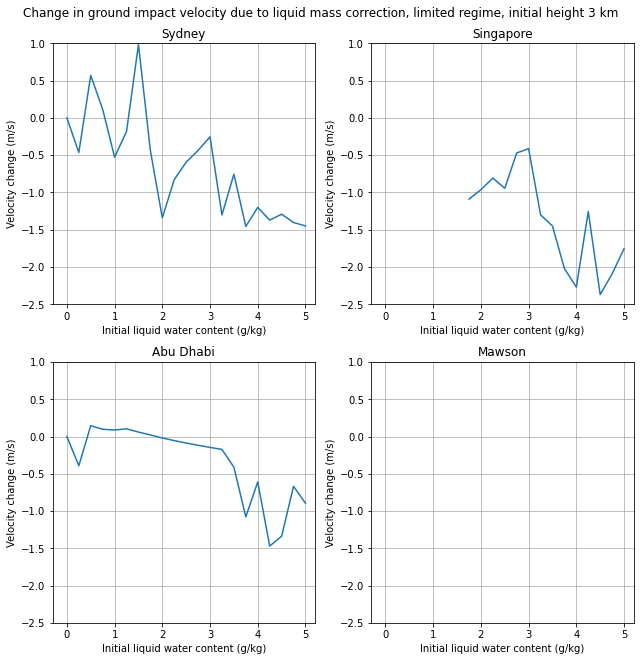

In [34]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        (limited_motion_3km[sounding.name].hit_ground_velocity
         - limited_motion_3km_old[sounding.name].hit_ground_velocity))
    ax.set_xlim(-0.3, 5.2)
    ax.set_ylim(-2.5, 1)
    ax.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Velocity change (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Change in ground impact velocity due to liquid mass correction, '
    'limited regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_ground_impact_velocity_3km_correction_difference.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

We can see that with the liquid mass correction applied, the parcels descend further and impact the ground with higher velocities, as expected.

## Feedback and next steps

- Debug parcel motion functions for saturated and limited water regimes
- Give parcel downward nudge without evaporation to determine stability, ~1m/s
- Account for mass of liquid water when calculating density
- Model entrainment
- Presentation to group next Thursday